In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [30]:
dataset=pd.read_csv("/Users/ratho/OneDrive/Desktop/LP3/ML/uber.csv")

In [31]:
print(dataset)


        Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199997    27804658   2009-06-29 00:42:00.00000078         30.9   
199998    20259894    2015-05-20 14:56:25.0000004         14.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude  \
0       2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1       2009-07-17 20:04:56 UTC        -73.994355        40.728225 

In [32]:
dataset.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [33]:
dataset.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [34]:
dataset.shape


(200000, 9)

In [35]:
dataset.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [36]:
df1 = dataset.dropna()

In [37]:
dataset.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [38]:
x = df1[["pickup_latitude","dropoff_latitude","pickup_longitude","dropoff_longitude"]]


In [39]:
x.head()

,pickup_latitude,dropoff_latitude,pickup_longitude,dropoff_longitude
0,40.738354,40.723217,-73.999817,-73.999512
1,40.728225,40.750325,-73.994355,-73.994710
2,40.740770,40.772647,-74.005043,-73.962565
3,40.790844,40.803349,-73.976124,-73.965316
4,40.744085,40.761247,-73.925023,-73.973082


In [40]:
y= df1["fare_amount"]


In [41]:
y.head()

0     7.5
1     7.7
2    12.9
3     5.3
4    16.0
Name: fare_amount, dtype: float64

In [42]:
corr=df1.corr()
print(corr)

                   Unnamed: 0  fare_amount  pickup_longitude  pickup_latitude  \
Unnamed: 0           1.000000     0.000587          0.000230        -0.000341   
fare_amount          0.000587     1.000000          0.010458        -0.008482   
pickup_longitude     0.000230     0.010458          1.000000        -0.816461   
pickup_latitude     -0.000341    -0.008482         -0.816461         1.000000   
dropoff_longitude    0.000270     0.008986          0.833026        -0.774787   
dropoff_latitude     0.000271    -0.011014         -0.846324         0.702367   
passenger_count      0.002259     0.010158         -0.000415        -0.001559   

                   dropoff_longitude  dropoff_latitude  passenger_count  
Unnamed: 0                  0.000270          0.000271         0.002259  
fare_amount                 0.008986         -0.011014         0.010158  
pickup_longitude            0.833026         -0.846324        -0.000415  
pickup_latitude            -0.774787          0.702367 

C:\Users\ratho\AppData\Local\Temp\ipykernel_13336\349081509.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df1.corr()


C:\Users\ratho\AppData\Local\Temp\ipykernel_13336\897044796.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(df1.corr(), cmap="YlGnBu", annot=True)


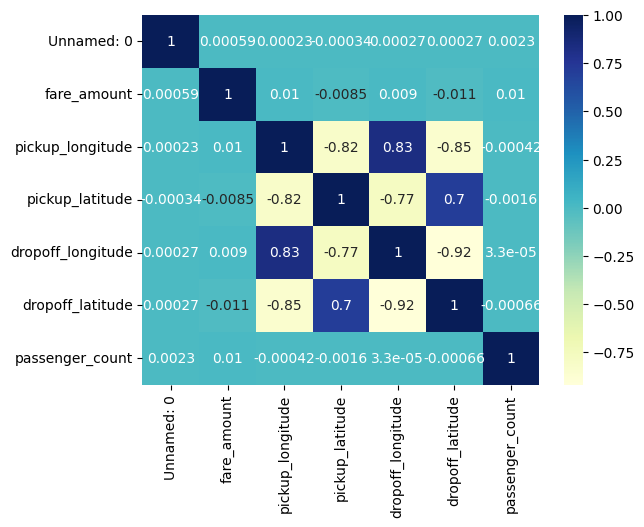

In [43]:
dataplot = sb.heatmap(df1.corr(), cmap="YlGnBu", annot=True)

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [45]:
model = LinearRegression()

In [46]:
model.fit(x_train,y_train)

LinearRegression()

In [47]:
y_pred= model.predict(x_test)

In [48]:
print(y_pred)

[11.3442846  11.34491051 11.34464479 ... 11.34579944 11.34591045
 12.13429154]


In [49]:
error_rate_test = r2_score(y_test,y_pred)
error_rate_test

-1.3281707183843139e-05

In [50]:
print(mean_squared_error(y_test, y_pred,squared=False))

9.837566041690636


In [51]:
rms = sqrt(mean_squared_error(y_test, y_pred))

In [52]:
print(rms)

9.837566041690636


In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
randomforestregressor =RandomForestRegressor()


In [58]:

randomforestregressor.fit(x_train, y_train);

In [59]:
randomforestpredictor=randomforestregressor.predict(x_test)

In [60]:
print("r2 score : ",r2_score(y_test,randomforestpredictor))
print("RMSE : ",mean_squared_error(y_test,randomforestpredictor))




r2 score :  0.7799216059096394
RMSE :  21.298399158515966
